In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
PATH = "./measurements/full-x4"

In [3]:
fechas=['2021-11-03_17-49-11','2021-11-05_16-07-41','2021-11-05_18-09-50',]
data=[]

for i in fechas:
    data.append(pd.read_csv(f"{PATH}/{i}/figuras/area_{i}.csv"))

In [4]:
#OBSERVACIONES EN EL TIEMPO: x, por el eje. ESTO PARA LA MEDICIÓN ANTERIOR, NO BORRAR

#1/4 porque son 4 mediciones en un día, así queda en función de los días
dt=1/4
x_1= np.arange(0,len(data[0]["# nro"])/4,dt) #Primera medición desde el 03/11 hasta el 05/11; son 7 mediciones
x_2= np.array([x_1[-1] + dt]) #medición del 05/11 a las 16hs, única medición
x_3= x_2 + np.arange(dt,len(data[2]["# nro"])/4+dt,dt) #continuación de las mediciones, desde 05/11 a las 18hs hasta 08/11 mediodía, total 11 mediciones
#x_4 NO CONTAR LA MEDICION DEL 08/11 AL MEDIODIA

args=(x_1,x_2,x_3)
x=np.concatenate(args)

In [5]:
#AREAS
area1=[]
area2=[]
area3=[]
area4=[]

for i in range(len(fechas)):
    area1.append(np.array(data[i]['Area1']))
    area2.append(np.array(data[i]['Area2']))
    area3.append(np.array(data[i]['Area3']))
    area4.append(np.array(data[i]['Area4']))

area1=np.concatenate(area1)
area2=np.concatenate(area2)
area3=np.concatenate(area3)
area4=np.concatenate(area4)

In [6]:
area1/60

array([13860.51666667, 16247.35      , 13176.45833333,  4744.31666667,
       19291.00833333, 19080.33333333, 21125.225     , 11299.125     ,
          65.1       ,    65.35      ,    54.70833333,    66.        ,
          66.6       ,    66.9       ,    66.95      ,    67.1       ,
          67.25      ,    67.5       ,    67.7       ,    67.8       ,
          67.65      ,    56.25      ,    67.75      ,    67.75      ,
          67.5       ,    67.25      ,    67.3       ,    67.4       ,
          67.3       ,    67.        ,    67.1       ,    67.2       ,
          56.33333333,    67.7       ,    67.7       ,    67.75      ,
          67.95      ,    67.85      ,    68.25      ,    68.7       ,
          69.1       ,    57.83333333,    69.45      ,    58.04166667,
          69.9       ,    70.1       ,    70.25      ,    70.25      ,
          70.4       ,    70.5       ,    70.5       ,    70.7       ,
          58.66666667,    70.15      ,    70.        ,    69.8       ,
      

La fórmula es 
g= $\frac{F CT 44 g/mol}{22414 . 10^6 0.001L/mol}$

Con F el flujo (1.5L/min), CT el área bajo la curva en MINUTOS, como lo tenemos en segundos:

g= $\frac{F* CT/60 * 44 g/mol}{22414 . 10^6 0.001L/mol}$

In [7]:
F = 1.5
den = 22414 * 0.001 * 10 ** 6

def gramos(x): #meter el área
    return F * x * 44 / (den*60)


In [8]:
gramos1=np.array(gramos(area1))
gramos2=np.array(gramos(area2))
gramos3=np.array(gramos(area3))
gramos4=np.array(gramos(area4))

In [9]:
#Gramos acumulados, suponiendo que ese valor se produjo durante 6h
gramos1_ac=np.add.accumulate(gramos1*6)
gramos2_ac=np.add.accumulate(gramos2*6)
gramos3_ac=np.add.accumulate(gramos3*6)
gramos4_ac=np.add.accumulate(gramos4*6)

Cada área tomada fue de 25 minutos, por tanto, hacemos regla de 3 simples para comparar con el de titulacion (5.5h)

25 min ---- area

5.5h=330min ----

se debe multiplicar al eje Y por 330/25=13.2 ¿¿¿???

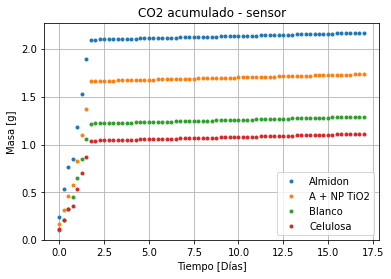

In [10]:
plt.plot(x,gramos1_ac,'.',label='Almidon')
plt.plot(x,gramos3_ac,'.',label='A + NP TiO2')
plt.plot(x,gramos4_ac,'.',label='Blanco')
plt.plot(x,gramos2_ac,'.',label='Celulosa')
plt.legend()
plt.title('CO2 acumulado - sensor')
plt.xlabel('Tiempo [Días]')
plt.ylabel('Masa [g]')
plt.grid(True)
plt.savefig("co2_acumulado-sensor_primer-medicion.png")
plt.show()

# Segundo intento

In [124]:
# Voy a hacer uno a la vez

In [174]:
c=area3/(25*60) #concentración en un momento dado

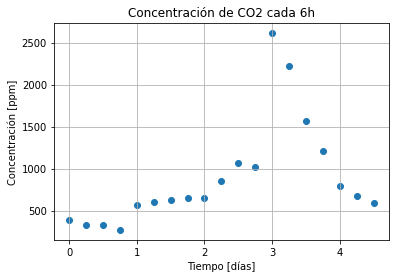

In [175]:
plt.scatter(x,c)
plt.title('Concentración de CO2 cada 6h')
plt.xlabel('Tiempo [días]')
plt.ylabel('Concentración [ppm]')
plt.grid(True)
plt.show()

In [176]:
#Tomo el valor medio entre un punto y el otro, para calcular la concentración promedio en cada intervalo

c_mean=[]
for i in range(len(c)-1):
    c_mean.append(([c[i]]+c[i+1])/2)

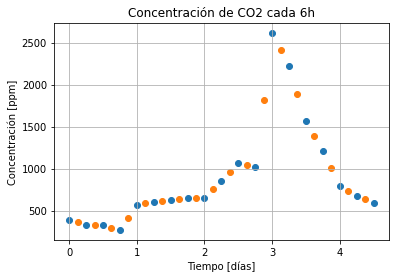

In [177]:
plt.scatter(x,c)
plt.scatter(x[:-1]+0.25/2,c_mean)
plt.title('Concentración de CO2 cada 6h')
plt.xlabel('Tiempo [días]')
plt.ylabel('Concentración [ppm]')
plt.grid(True)
plt.show()

In [178]:
#Con ese promedio, estimo que ese fue el valor en la ventana de 6h
g=1.2*np.array(c_mean)*44*6*60/(22414*0.001*10**6)

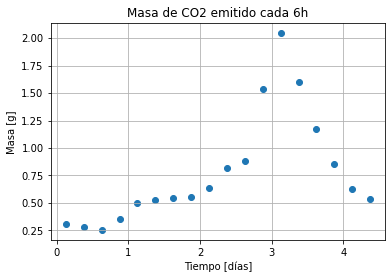

In [179]:
plt.scatter(x[:-1]+0.25/2,g)
plt.title('Masa de CO2 emitido cada 6h')
plt.xlabel('Tiempo [días]')
plt.ylabel('Masa [g]')
plt.grid(True)
plt.show()

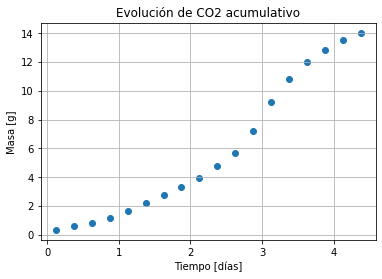

In [180]:
plt.scatter(x[:-1]+0.25/2,np.add.accumulate(g))
plt.title('Evolución de CO2 acumulativo')
plt.xlabel('Tiempo [días]')
plt.ylabel('Masa [g]')
plt.grid(True)
plt.show()

In [12]:
#Calculo las concentraciones promedio
c_1=area1/(25*60)
c_2=area2/(25*60)
c_3=area3/(25*60)
c_4=area4/(25*60)

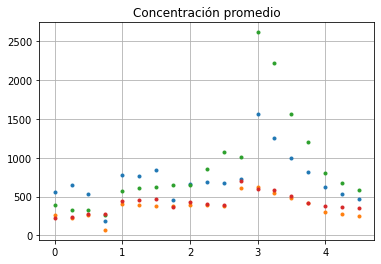

In [13]:
plt.title('Concentración promedio')
plt.plot(x,c_1,'.')
plt.plot(x,c_2,'.')
plt.plot(x,c_3,'.')
plt.plot(x,c_4,'.')
plt.grid(True)
plt.show()

Según la tesis, toma el valor medio entre un punto y el otro; y ese es el valor para todo ese intervalo de tiempo
A= (C[n] + C[n+1] ) * (t[n] - t[n-1]) /2

In [14]:
CT_1=[] #en minutos
CT_2=[]
CT_3=[]
CT_4=[]

for i in range(len(c_1)-1):
    CT_1.append((c_1[i]+c_1[i+1])*6*60/2)
    CT_2.append((c_2[i]+c_2[i+1])*6*60/2)
    CT_3.append((c_3[i]+c_3[i+1])*6*60/2)
    CT_4.append((c_4[i]+c_4[i+1])*6*60/2)

In [15]:
gramos1=np.array(gramos(np.array(CT_1)))
gramos2=np.array(gramos(np.array(CT_2)))
gramos3=np.array(gramos(np.array(CT_3)))
gramos4=np.array(gramos(np.array(CT_4)))

In [16]:
gramos1_ac=[gramos1[0]]
gramos2_ac=[gramos2[0]]
gramos3_ac=[gramos3[0]]
gramos4_ac=[gramos4[0]]


for i in range(len(gramos1)-1):
    gramos1_ac.append(gramos1_ac[i]+gramos1[i+1])
    gramos2_ac.append(gramos2_ac[i]+gramos2[i+1])
    gramos3_ac.append(gramos3_ac[i]+gramos3[i+1])
    gramos4_ac.append(gramos4_ac[i]+gramos4[i+1])

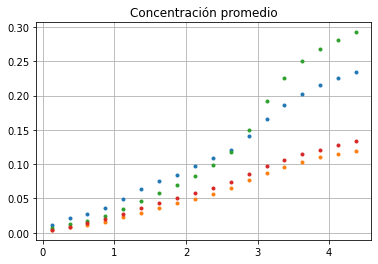

In [18]:
plt.title('Concentración promedio')
plt.plot(x[:-1]+0.25/2,gramos1_ac,'.')
plt.plot(x[:-1]+0.25/2,gramos2_ac,'.')
plt.plot(x[:-1]+0.25/2,gramos3_ac,'.')
plt.plot(x[:-1]+0.25/2,gramos4_ac,'.')
plt.grid(True)
plt.show()